   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 55.5 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


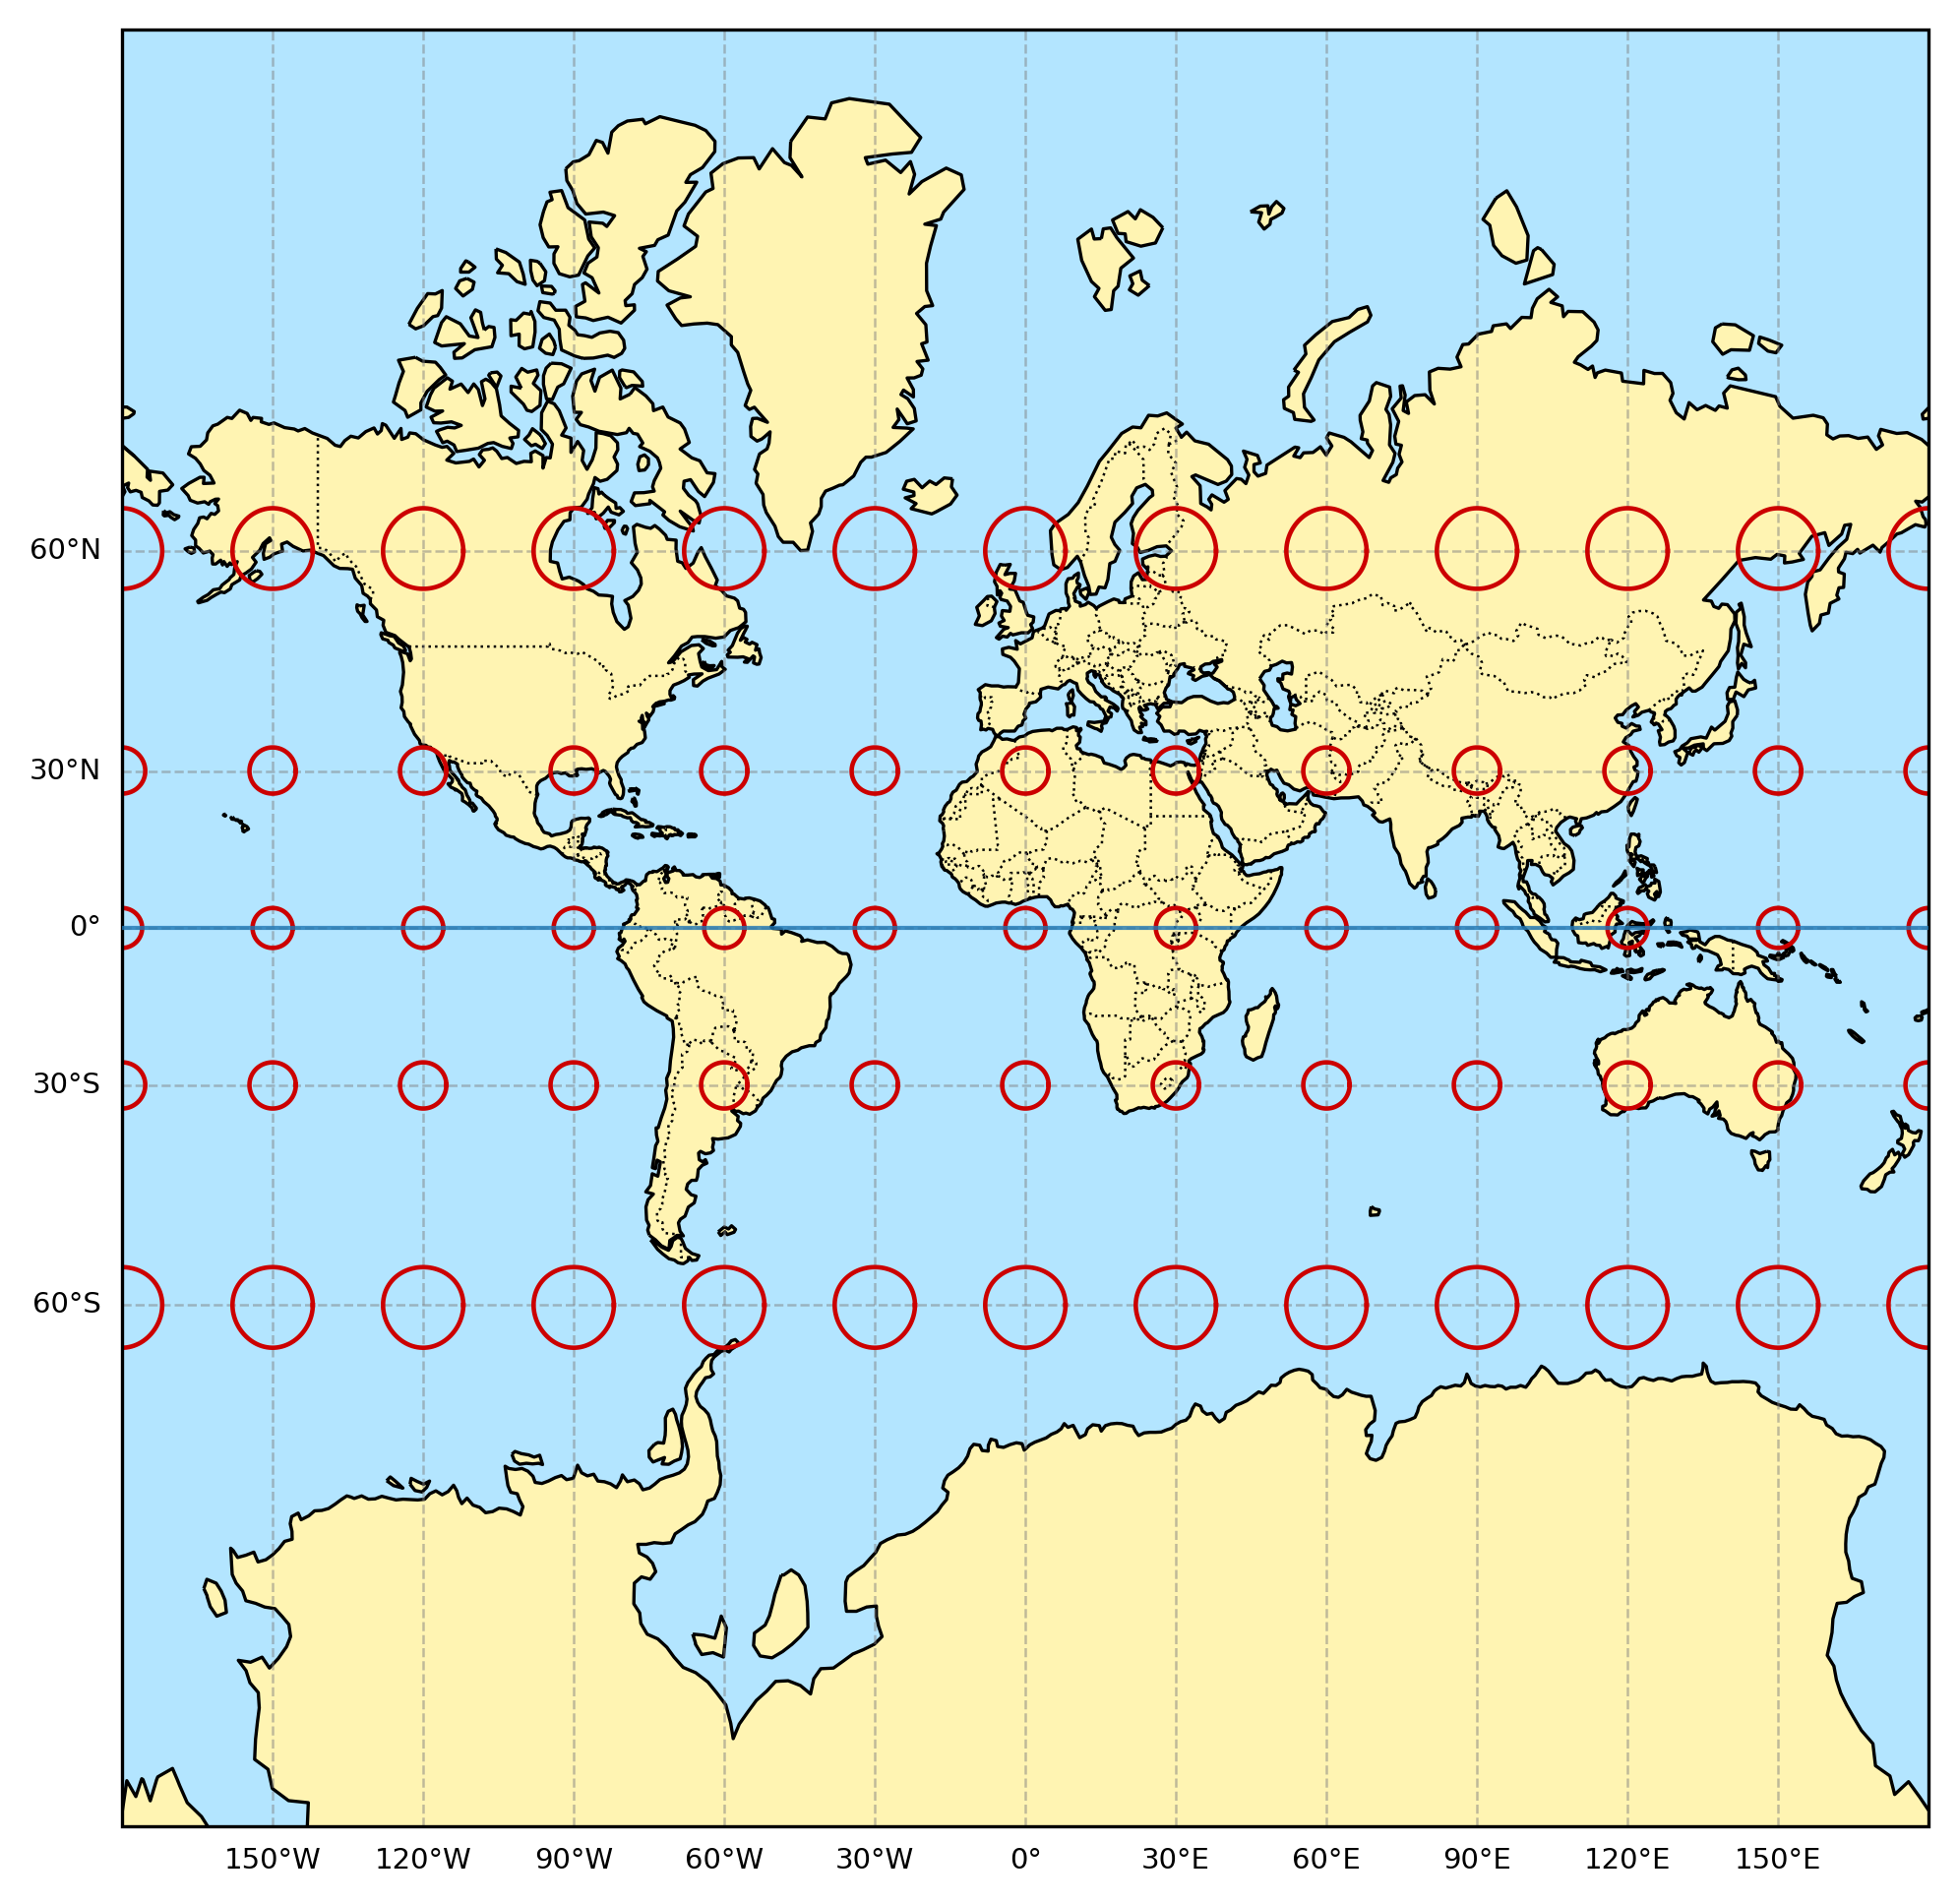

In [1]:
# === IMPORTS ===
!pip install cartopy matplotlib numpy -q

import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# === PROJEÇÃO DE MERCATOR ===
mercator = ccrs.Mercator(min_latitude=-85, max_latitude=85)
plate = ccrs.PlateCarree()

# === FUNÇÃO PARA DESENHAR ELIPSES DE TISSOT ===
def tissot(ax, lon, lat, radius_deg=5, n_points=100, **kwargs):
    """
    Desenha uma elipse de Tissot centrada em (lon, lat).
    radius_deg controla o tamanho angular (em graus) da elipse.
    """
    theta = np.linspace(0, 2 * np.pi, n_points)
    # Pequena circunferência no sistema geográfico
    dlon = radius_deg * np.cos(theta)
    dlat = radius_deg * np.sin(theta)
    # Corrigir longitude com fator de escala dependente da latitude

    ell_x = lon + dlon / np.cos(np.radians(lat))
    ell_y = lat + dlat
    ax.plot(ell_x, ell_y, transform=plate, **kwargs)


# === FIGURA ===
fig = plt.figure(figsize=(14, 8), dpi=300)
ax = plt.axes(projection=mercator)
ax.set_global()

# Fundo
ax.add_feature(cfeature.LAND, facecolor='#fff4b2')
ax.add_feature(cfeature.OCEAN, facecolor='#b3e5ff')
ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.6)

# Grade
gl = ax.gridlines(draw_labels=True, linewidth=0.6, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = gl.right_labels = False
gl.xlocator = plt.FixedLocator(np.arange(-180, 181, 30))
gl.ylocator = plt.FixedLocator(np.arange(-90, 91, 30))

# === AJUSTE DO TAMANHO DA FONTE DOS RÓTULOS DE COORDENADAS ===
gl.xlabel_style = {'size': 7}
gl.ylabel_style = {'size': 7}

# === EQUADOR
ax.hlines(0, xmin=-180, xmax=180,
          color='#1f77b4', linewidth=1, alpha=0.8,
          transform=plate, zorder=5)

# === ELIPSES DE TISSOT
lons = np.arange(-150, 181, 30)
lats = np.arange(-60, 61, 30)
for lon in lons:
    for lat in lats:
        # Usando a cor vermelha escura e a linha grossa
        tissot(ax, lon, lat, radius_deg=4,
               color='#cc0000', linewidth=1.1, alpha=1.0) # Ajustado para cor e linha

# Ajustes
plt.tight_layout(rect=[0, 0.05, 1, 0.90])
plt.subplots_adjust(top=0.85)

plt.show()